## Домашнее задание 3 (10 баллов)

## НИУ ВШЭ, 2023-24 учебный год

## О задании

# Основные правила оформления графиков:
#### 1. Любой график всегда имеет название.
#### 2. Оси у графика подписаны (исключение - график делит название оси с соседним).
#### 3. Подписи делаются на одном языке (либо английский, либо русский), но не на их смеси.
#### 4. Если вы выводите несколько графиков, то они размещаются в рамках одного объекта matplotlib.pyplot.figure. Вы не выводите графики последовательно, а смотрите, как их разместить сразу все за раз.
#### 5. Отдельные графики (если графиков на картинке больше 1) также имеют свои названия.
#### 6. Если на графике есть несколько различных объектов, то для их различения используется легенда. Помещайте легенду в место, где она в наименьшей мере мешает восприятию самого графика.
#### 7. Если есть легенда, то она должна иметь навание, а также ее содержание должно быть адекватными (пожалейте проверяющих, они не хотят разбирать, а к чему относится зеленая линия, которая на легенде помечена меткой "0").
#### 8. Используйте цветовые гаммы, чтобы объекты на графиках отличались цветом.
#### 9. Текст на визуализации должен быть читаем. Если вы вывели названия категорий в качестве подписей на оси Х, а эти названия наезжают друг на друга, то вам нужно что-то с этим сделать. Нечитаемый или плохо читаемый (очень маленький, невероятно огромный) текст ведет к снижению баллов.


## О данных

Будем работать с [датасетом физической активности](https://www.kaggle.com/datasets/uciml/human-activity-recognition-with-smartphones).

В этом датасете собраны данные 30 человек, выполняющих различные действия со смартфоном на поясе. Данные записывались с помощью датчиков (акселерометра и гироскопа) в этом смартфоне. Были зафиксированы: "3-осевое линейное ускорение" (_tAcc-XYZ_) и "3-осевая угловая скорость" (_tGyro-XYZ_).

1. Все сигналы отсортированы по времени, пропущены через фильтр шума.
2. Все наблюдения были разделены на окна по 128 сигналов в каждом, причем окна пересекаются на 50% (грубо говоря, с 1 по 128 сигнал в 1 окно, с 64 до 192 сигнала - во 2 окно и так далее).
3. Линейное ускорение было разделено на две составляющие (с помощью низкочастотного фильтра): ускорение самого тела, а также гравитационная составляющая. Будем называть их ускорением тела и гравитационным ускорением.
4. К получившимся окнам применяли различные функции для получения следующих показателей:
    - max
    - min
    - mad (median)
    - mean
    - std
    - skewness (коэффициент асимметричности распределения признака в окне)
    - etc. (подробнее, на сколько это возможно, указано на [страничке датасета](https://archive.ics.uci.edu/dataset/240/human+activity+recognition+using+smartphones))
5. Величина (magnitude) сигнала также определялась через евклидову норму всех значений из вектора для одного окна.
6. К окнам было применено преобразование Фурье, чтобы получить частоты. Из частот были извелченыте же показатели, плюс новые:
    - bandsEnergy (энергия частотного интервала)
7. Были посчитаны углы между векторами соответствующих окон.
8. Для ускорений были посчитаны производные - рывки, к которым применялись те же функции.

Итог: в датасете каждый признак - это какая-то операция над вектором из 128 чисел, которые соответствуют замерам определенного человека занятого какой-то активностью на протяжении 2.56 секунд.

Как читать названия признаков? Примеры:
- `tBodyAccMag-mean()` - это вектор ускорений тела (без гравитационной составляющей этого ускорения), из которого взяли евклидову норму, а затем усреднили, чтобы получить скаляр
- `fBodyAcc-bandsEnergy()-1,8.2` - это вектор ускорения тела, к которому применили преобразование Фурье, преобразовав его в вектор частот, а затем посчитали на этом векторе энергию данного частотного интервала в определенном диапазоне частот (в данном случае 1 - 8.2)
- `angle(X,gravityMean)` - это угол между осью Х и вектором усредненных значений гравитационного ускорения из соответствующего окна


## Предобработка данных

In [ ]:
!wget https://github.com/alarfil/iad_datasets/raw/main/archive.zip
!unzip /content/archive.zip "*.csv"

--2024-02-29 14:23:58--  https://github.com/alarfil/iad_datasets/raw/main/archive.zip
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/alarfil/iad_datasets/main/archive.zip [following]
--2024-02-29 14:23:58--  https://raw.githubusercontent.com/alarfil/iad_datasets/main/archive.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25693584 (25M) [application/zip]
Saving to: ‘archive.zip’

archive.zip         100%[===================>]  24.50M  49.6MB/s    in 0.5s    

2024-02-29 14:24:00 (49.6 MB/s) - ‘archive.zip’ saved [25693584/25693584]

Archive:  /content/archive.zip
  inflating: test.csv    

In [ ]:
12345678765434
products = 'бананы яблоки лимоны апельсины'
for pr in products.split()
if len(pr) > 6:
  len(pr)```
В переменной products сохранена строка с названиями товаров. Программа выше должна проверять,
 что в названии товара больше 6 символов, и если да — печатать его.

```lang:python;;апельсины```
Выберите все причины (минимум две), по которым код не будет работать как ожидается.

Важно! Номера в квадратных скобках не являются частью программы и просто обозначают порядковый номер строки.
=

В строке [3] в цикле for вместо переменной pr должна использоваться переменная i


В строке [5] вместо функции len() должна быть написана функция print()

1
2
10
10
11
12
0
2


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv("test.csv")

In [ ]:
cols_subset = [
    'tBodyAccMag-mean()',  # усредненная величина ускорения тела
    'tBodyGyroJerk-mad()-X',  # медианная величина рывка тела по оси Х
    'tGravityAcc-min()-X',  # минимум гравитационной составляющей ускорения по оси Х
    'tBodyAcc-max()-X',  # максимальная величина ускорения тела по оси Х
    'fBodyAcc-bandsEnergy()-1,8.2',  # энергия ускорения тела в интервале частоты
    'angle(X,gravityMean)',  # угол между осью Х и усредненной гравитационной составляющей ускорения
    'angle(Y,gravityMean)',  # угол между осью Y и усредненной гравитационной составляющей ускорения
    'angle(Z,gravityMean)',  # угол между осью Z и усредненной гравитационной составляющей ускорения,
    'fBodyAcc-skewness()-X',  # асимметричность частоты ускорения тела по оси Х
    'subject',  # номер испытуемого
    'Activity',  # название вида деятельности (целевая переменная)
]

In [ ]:
train = train[cols_subset]
test = test[cols_subset]

### Задание 1 (0.5 балла)

Пропуски и дубли в данных train и test?

In [ ]:
print(test.isnull().sum(),'\n') #ищу, есть ли нулевые и вывожу их число по отдельности по каждому количественному стобцу
print(train.isnull().sum(),'\n')
print(len(train)-len(train.duplicated()),'\n') #из общего кол-ва элтов выборки вычитаю кол-во дубликатов, поэтому в выводе только одно число, а не распределение по столбцам (0)
print(len(train)-len(train.duplicated()))

tBodyAccMag-mean()              0
tBodyGyroJerk-mad()-X           0
tGravityAcc-min()-X             0
tBodyAcc-max()-X                0
fBodyAcc-bandsEnergy()-1,8.2    0
angle(X,gravityMean)            0
angle(Y,gravityMean)            0
angle(Z,gravityMean)            0
fBodyAcc-skewness()-X           0
subject                         0
Activity                        0
dtype: int64 

tBodyAccMag-mean()              0
tBodyGyroJerk-mad()-X           0
tGravityAcc-min()-X             0
tBodyAcc-max()-X                0
fBodyAcc-bandsEnergy()-1,8.2    0
angle(X,gravityMean)            0
angle(Y,gravityMean)            0
angle(Z,gravityMean)            0
fBodyAcc-skewness()-X           0
subject                         0
Activity                        0
dtype: int64 

0 

0


# **Ни дублей, ни пропусков нет ⛄**

### Задание 2 (0.5 балла)

**1. Основные статистики данных:**

среднее,

медиана,

перцентили (0.25, 0.5, 0.75),

минимум,

максимум,

стандартное отклонение.

**2. Что-то интересное в таблице?**

In [ ]:
display(train.describe())
display(test.describe())

tBodyAccMag-mean()  tBodyGyroJerk-mad()-X  tGravityAcc-min()-X  \
count         7352.000000            7352.000000          7352.000000   
mean            -0.543884              -0.727735             0.678505   
std              0.477653               0.315832             0.508656   
min             -1.000000              -0.999889            -1.000000   
25%             -0.983282              -0.991595             0.804270   
50%             -0.883371              -0.950268             0.926693   
75%             -0.106892              -0.474625             0.965095   
max              1.000000               1.000000             1.000000   

       tBodyAcc-max()-X  fBodyAcc-bandsEnergy()-1,8.2  angle(X,gravityMean)  \
count       7352.000000                   7352.000000           7352.000000   
mean          -0.468604                     -0.847963             -0.489547   
std            0.544547                      0.233633              0.511807   
min           -1.000000                     -1.000000             -1.000000   
25%           -0.936219                     -0.999480             -0.812065   
50%           -0.881637                     -0.986582             -0.709417   
75%           -0.017129                     -0.764508             -0.509079   
max            1.000000                      1.000000              1.000000   

       angle(Y,gravityMean)  angle(Z,gravityMean)  fBodyAcc-skewness()-X  \
count           7352.000000           7352.000000            7352.000000   
mean               0.058593             -0.056515              -0.128562   
std                0.297480              0.279122               0.403686   
min               -1.000000             -1.000000              -0.931208   
25%               -0.017885             -0.143414              -0.486841   
50%                0.182071              0.003181              -0.163271   
75%                0.248353              0.107659               0.155112   
max                0.478157              1.000000               1.000000   

           subject  
count  7352.000000  
mean     17.413085  
std       8.975143  
min       1.000000  
25%       8.000000  
50%      19.000000  
75%      26.000000  
max      30.000000

tBodyAccMag-mean()  tBodyGyroJerk-mad()-X  tGravityAcc-min()-X  \
count         2947.000000            2947.000000          2947.000000   
mean            -0.559043              -0.735661             0.696878   
std              0.439539               0.282074             0.502873   
min             -0.998936              -1.000000            -0.756774   
25%             -0.978433              -0.989078             0.836787   
50%             -0.861830              -0.914698             0.934930   
75%             -0.149596              -0.486423             0.970871   
max              0.479547               0.117606             0.996148   

       tBodyAcc-max()-X  fBodyAcc-bandsEnergy()-1,8.2  angle(X,gravityMean)  \
count       2947.000000                   2947.000000           2947.000000   
mean          -0.462063                     -0.880361             -0.513923   
std            0.523916                      0.160496              0.509205   
min           -0.952357                     -0.999989             -0.984195   
25%           -0.934447                     -0.999330             -0.829722   
50%           -0.852659                     -0.979336             -0.729648   
75%           -0.009965                     -0.799113             -0.545939   
max            0.786436                      0.048730              0.833180   

       angle(Y,gravityMean)  angle(Z,gravityMean)  fBodyAcc-skewness()-X  \
count           2947.000000           2947.000000            2947.000000   
mean               0.074886             -0.048720              -0.154042   
std                0.324300              0.241467               0.392203   
min               -0.913704             -0.949228              -1.000000   
25%                0.022140             -0.098485              -0.497070   
50%                0.181563             -0.010671              -0.202050   
75%                0.260252              0.092373               0.140254   
max                1.000000              0.973113               0.960367   

           subject  
count  2947.000000  
mean     12.986427  
std       6.950984  
min       2.000000  
25%       9.000000  
50%      12.000000  
75%      18.000000  
max      24.000000

#▶**Из "интересного":**
### 1. Данные нормализованы. Это очень приятная мелочь, так как нормализованные данные проще сравнивать и анализировать (все, кроме признака subject, так как это всего лишь номер испытуемого)
### 2. Выборка корректно разделена на train и test по пропорциям - train составляет 71,39% от общего количества участников исследования, а test - 28,61%.
### **3. Данные определенно распределены неравномерно, так как среднее и медиана сильно разнятся (примерно 0.2 пункта), судя по этому, присуствует ощутимое количество выбросов.**
### **4. Если посмотреть на среднее и минимальное и максимальное количество, гипотеза о наличии выбросов будет подтверждаться тем, что среднее чаще всего по выборке приближены к min, значит выбросы тоже приближены к min и являются значительными по размеру (так как они "тянут" среднее на себя)**

#**Конкретика по сравнению train и test (вероятно, может повлиять на точность предсказания):**
### 4. разница в 0.25 пунктов в min по  tGravityAcc-min()-X (min) между train и test выборками
### 5. На трейне - положительный показатель на тесте отрицательный по angle(Z,gravityMean) (50% - медиана)
### 6. По tBodyAccMag-mean() (max)	на тесте - 0.479547, на трейне - аж единица




### Задание 3 (0.5 балла)

Данные сбалансированы?


Выведите количество наблюдений для всех категорий активности в train и test.

Посчитайте разницу в процентах между самой крупной категорией и самой маленькой

 Если разница (округленная до ближайшего целого числа) не превышает 30%, то давайте для наших целей считать, что данные сбалансированы.

  Напишите, сбалансированы ли данные в train и test.

In [ ]:
un=test['Activity'].unique()
print(*un, sep=',')
#посмотрела, какие категории в активности вообще есть

STANDING,SITTING,LAYING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS


In [ ]:
#я знаю, что это задание можно было сделать короче через:
#print(test.value_counts(['Activity']))
#но я вспоминала f-string
s=[]
for i in un:
    print(f'Количество наблюдений для "{i}":',len(test[test['Activity']==f'{i}']))
    s.append(len(test[test['Activity']==f'{i}'])) #список, чтобы потом найти максимальную и минимальную категорию
print((max(s)-min(s))/max(s)*100)

Количество наблюдений для "STANDING": 532
Количество наблюдений для "SITTING": 491
Количество наблюдений для "LAYING": 537
Количество наблюдений для "WALKING": 496
Количество наблюдений для "WALKING_DOWNSTAIRS": 420
Количество наблюдений для "WALKING_UPSTAIRS": 471
21.787709497206702


In [ ]:
#второй способ: print(train.value_counts(['Activity']))
s=[]
for i in un:
    print(f'Количество наблюдений для "{i}":',len(train[train['Activity']==f'{i}']))
    s.append(len(train[train['Activity']==f'{i}']))
print((max(s)-min(s))/max(s)*100)

Количество наблюдений для "STANDING": 1374
Количество наблюдений для "SITTING": 1286
Количество наблюдений для "LAYING": 1407
Количество наблюдений для "WALKING": 1226
Количество наблюдений для "WALKING_DOWNSTAIRS": 986
Количество наблюдений для "WALKING_UPSTAIRS": 1073
29.92181947405828


#▶ Данные сбалансированы, так ни на трейне, ни на тесте разность не превысила 30%

### Задание 4 (0.5 балла)

Посчитайте корреляции всех признаков (включая таргет) со всеми другими. Какими получились значения? Есть идеи, почему так? Напишите ваши мысли.

In [ ]:
#таргет переменная - категориальная, нужно рекодирование в дамми-переменную для построения корреляции:
train_rc= pd.get_dummies(train,columns=['Activity'])
train_rc.corr()

tBodyAccMag-mean()  tBodyGyroJerk-mad()-X  \
tBodyAccMag-mean()                      1.000000               0.899080   
tBodyGyroJerk-mad()-X                   0.899080               1.000000   
tGravityAcc-min()-X                     0.369962               0.380118   
tBodyAcc-max()-X                        0.959827               0.879900   
fBodyAcc-bandsEnergy()-1,8.2            0.697832               0.507939   
angle(X,gravityMean)                   -0.370849              -0.382246   
angle(Y,gravityMean)                    0.495561               0.478567   
angle(Z,gravityMean)                    0.426283               0.380967   
fBodyAcc-skewness()-X                   0.379796               0.266002   
subject                                -0.073652              -0.110321   
Activity_LAYING                        -0.396643              -0.386730   
Activity_SITTING                       -0.396389              -0.379403   
Activity_STANDING                      -0.414460              -0.370699   
Activity_WALKING                        0.358825               0.531695   
Activity_WALKING_DOWNSTAIRS             0.561344               0.445048   
Activity_WALKING_UPSTAIRS               0.405434               0.257524   

                              tGravityAcc-min()-X  tBodyAcc-max()-X  \
tBodyAccMag-mean()                       0.369962          0.959827   
tBodyGyroJerk-mad()-X                    0.380118          0.879900   
tGravityAcc-min()-X                      1.000000          0.380404   
tBodyAcc-max()-X                         0.380404          1.000000   
fBodyAcc-bandsEnergy()-1,8.2             0.239088          0.613383   
angle(X,gravityMean)                    -0.988663         -0.384192   
angle(Y,gravityMean)                     0.797116          0.480229   
angle(Z,gravityMean)                     0.667415          0.405023   
fBodyAcc-skewness()-X                   -0.261676          0.335708   
subject                                 -0.042371         -0.055633   
Activity_LAYING                         -0.973167         -0.394745   
Activity_SITTING                         0.187055         -0.387297   
Activity_STANDING                        0.262354         -0.399861   
Activity_WALKING                         0.234820          0.298526   
Activity_WALKING_DOWNSTAIRS              0.192409          0.658369   
Activity_WALKING_UPSTAIRS                0.159741          0.347429   

                              fBodyAcc-bandsEnergy()-1,8.2  \
tBodyAccMag-mean()                                0.697832   
tBodyGyroJerk-mad()-X                             0.507939   
tGravityAcc-min()-X                               0.239088   
tBodyAcc-max()-X                                  0.613383   
fBodyAcc-bandsEnergy()-1,8.2                      1.000000   
angle(X,gravityMean)                             -0.213318   
angle(Y,gravityMean)                              0.363170   
angle(Z,gravityMean)                              0.423927   
fBodyAcc-skewness()-X                             0.260316   
subject                                          -0.037000   
Activity_LAYING                                  -0.287395   
Activity_SITTING                                 -0.276766   
Activity_STANDING                                -0.296141   
Activity_WALKING                                  0.189834   
Activity_WALKING_DOWNSTAIRS                       0.217399   
Activity_WALKING_UPSTAIRS                         0.534750   

                              angle(X,gravityMean)  angle(Y,gravityMean)  \
tBodyAccMag-mean()                       -0.370849              0.495561   
tBodyGyroJerk-mad()-X                    -0.382246              0.478567   
tGravityAcc-min()-X                      -0.988663              0.797116   
tBodyAcc-max()-X                         -0.384192              0.480229   
fBodyAcc-bandsEnergy()-1,8.2             -0.213318              0.363170   
angle(X,gravityMean)               

## Мысли:
### 1. Коэфф корреляции по диагонали - единица, так как это корреляция признака с самим собой 😀
### 2. 'tBodyAccMag-mean()' (усредненная величина ускорения тела) имеет высокую корреляцию с признакими *'tBodyAcc-max()-X'* (максимальная величина ускорения тела по оси Х) (0.96), *'tBodyGyroJerk-mad()-X'* (медианная величина рывка тела по оси Х) (0.90), так как, например, совершение рывка телом или при ускорении тела по оси Х действительно находится в статистической зависимости с усредненной величиной ускорения тела (так как тела при этих действиях будет ускоряться соответственно). Корреляция между "уголом между осью Х и усредненной гравитационной составляющей ускорения" и между "усредненная величина ускорения тела" отрицательна (-0.37), и объясняться это может физическими законами.
### 3. **Очень важно рассмотреть корреляцию признака и таргета** - поскольку признак - среднее ускорение, то моя гипотеза состоит в том, что чем выше среднее ускорение, тем выше корреляция с "динамическими" активностями и тем меньше  связь со "статическими" активностями. Действительно, корреляция признака и таргета Activity_LAYING, Activity_SITTING, Activity_STANDING отрицательны, поскольку ускорения в этих активностях нет, а в динамическом есть: Спуск имеет самую большую корреляцию (0.56) как активность, имеющая самое высокое среднее ускорение из представленных, далее идет подъем (0.41) и только потом ходьба (0.36)
### 4. angle(X,gravityMean) коррелирует с лежанием очень сильно - 0.95, связано это, осмелюсь предположить (со своей очень слабой базой по физике, извините) с тем, что угол между Х и направлением гравитационного поля (?) будет равен практически нулю, в то время как при подъеме он чуть возрастает (корр -0.11), при сидении становится еще больше (что демонстриует корреляция в -0.18), а при хождении и спуске и вовсе достигает -0.23, что может демонстрировать о колебании этого угла при этой активности.

#### Остальные данные подчиняются похожей логике при анализе



## Exploratory Data Analysis

### Задание 5 (0.5 балла)


Любые математические функции (отличные от линейной) нарисуйте на одном графике.

Подпишите каждый из графиков, чтобы было понятно, какие функции вы выбрали.

Text(0, 0.5, 'y')

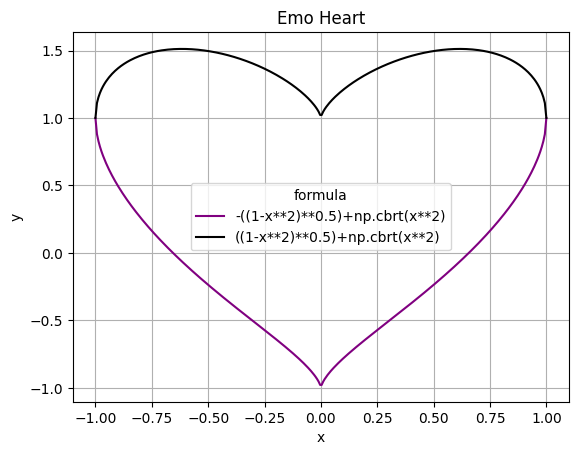

In [ ]:
x = np.linspace(-1, 1, 300) #300- подбор экспериментальным путем, чтобы график не был "угловатым", параметр кол-ва точек на коорд прямой
plt.plot(x,-((1-x**2)**0.5)+np.cbrt(x**2), color='purple',label='-((1-x**2)**0.5)+np.cbrt(x**2)')
plt.plot(x,((1-x**2)**0.5)+np.cbrt(x**2),color='black',label='((1-x**2)**0.5)+np.cbrt(x**2)')
plt.legend(loc='center', title='formula') #блокирую легенду в центре, чтобы не мешала восприятию графика
plt.grid() #"разлиновка"
plt.title('Emo Heart')
plt.xlabel('x')
plt.ylabel('y')

### Задание 6 (0.5 балла)

Визуализируйте количество сэмплов Активностей в каждой из категорий отдельно для train и test сетов.

Порядок категорий слева и справа одинаков.

В примере ось Х в одинаковом масштабе, что тоже удобно для сравнения.



Text(0.5, 1.0, 'Test set')

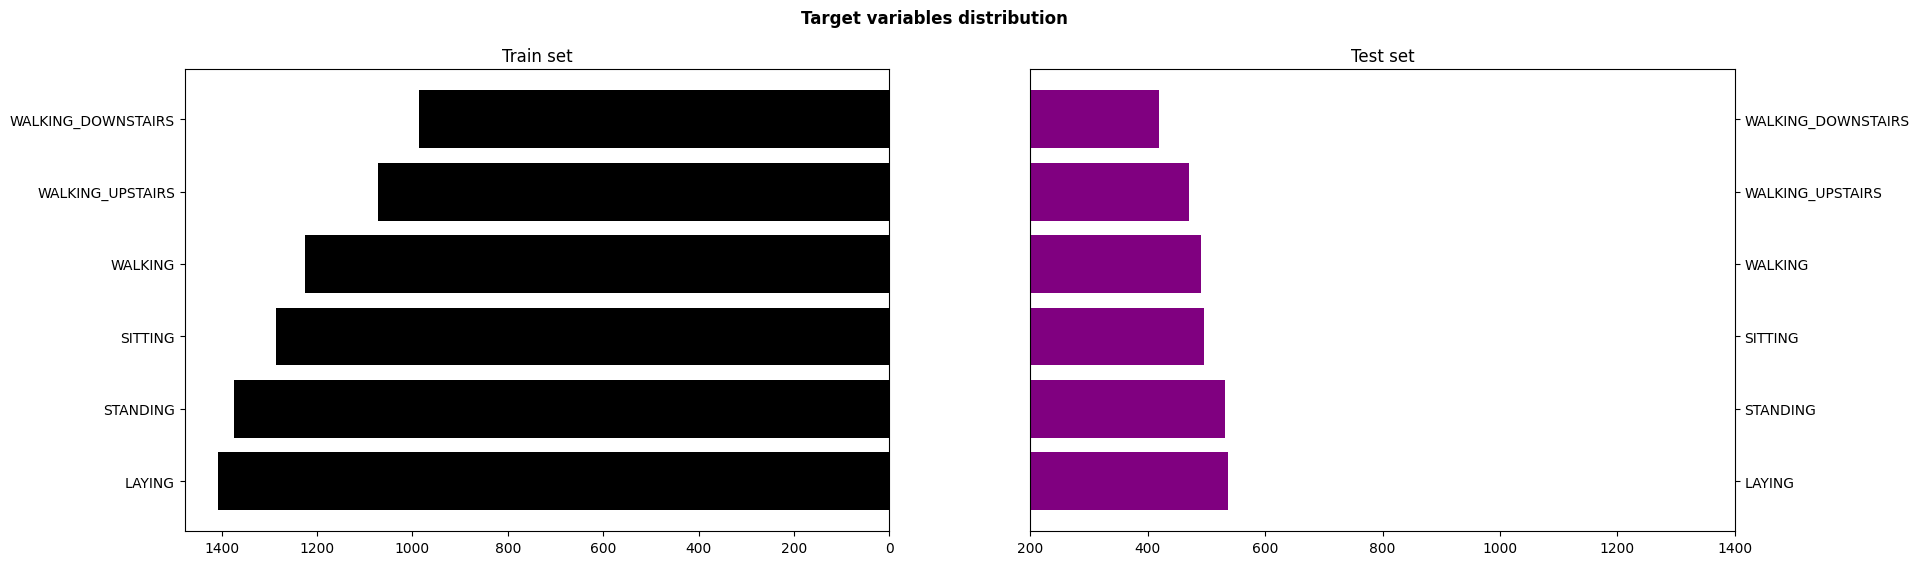

In [ ]:
plt.subplots(1, 2,figsize=(20,6)) #два контейнера по горизонтали фикс размера
plt.suptitle('Target variables distribution',fontweight='bold')
order=train['Activity'].value_counts().index #задаю порядок "активностей", чтобы удобнее было сопостовлять графики train и test
plt.subplot(1,2,1)
plt.barh(train['Activity'].value_counts().index,train['Activity'].value_counts(),color='black') #1- виды активности, которые откладываются по У, 2 -количество (по Х)
plt.gca().invert_xaxis() #текущий график инвертировать по оси Х
plt.title('Train set')
plt.subplot(1,2,2)
plt.xlim(200,1400) #отрезок коорд прямой - 200, конечная точка - 1400 (для одинакового масштаба)
plt.barh(test['Activity'].value_counts().reindex(order).index,test['Activity'].value_counts(),color='purple')
plt.gca().yaxis.tick_right() #перенесла активности второго графика вправо по оси У
plt.title('Test set')

# Итак, наглядно видно, что данные сбалансированы

*Правда на таких графиках проще проверять баланс классов таргета?)*

НЕ СОВСЕМ)))

### Задание 7 (0.5 балла)

Визуализируйте heatmap корреляций.

Подпишите значения корреляций, округленные до 2 знаков после запятой, на графике и оставьте только те значения, которые по модулю не меньше 0.5.


Какой признак стоит исключить из рассмотрения корреляций? +Причина

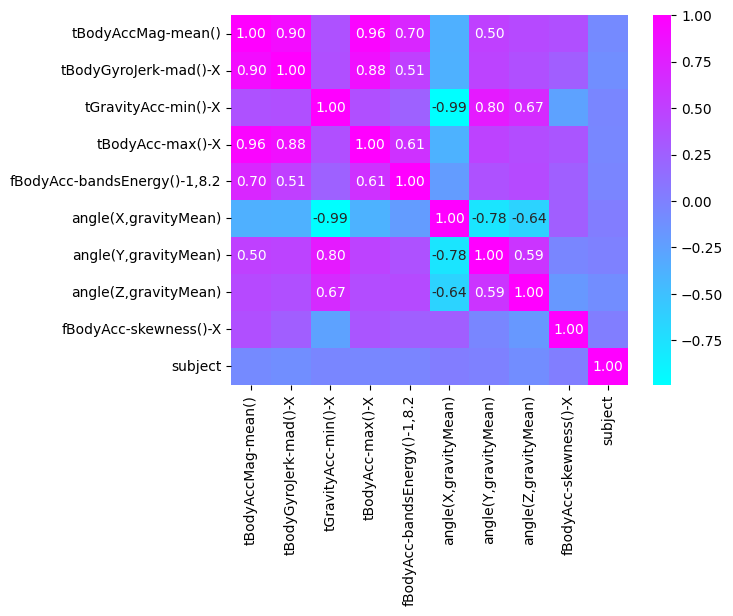

In [ ]:
ax = sns.heatmap(train.corr(), cmap='cool', annot=True, fmt="0.2f")
for t in ax.texts:
    if float(t.get_text()) >= 0.5 or float(t.get_text()) <= -0.5:
        t.set_text(t.get_text())
    else:
        t.set_text("")

## ▶Исключаю **subject**, так как он демонстрирует номер испытуемого и не является полноценным признаком - не влияет на таргет

### Если считать корреляцию значимой только при 0.5 по модулю, то полностью выбывает также из хитамапа еще и 'fBodyAcc-skewness()-X', но мне кажется не совсем корректным его исключать из рассмотрения, поскольку после с ним строятся некоторые завимости в заданиях, плюс все же он оказывает некоторое влияние на таргет.

### Задание 8 (0.5 балла)

Для начала будем стрелять из пушки по воробьям. Выведите pairplot по всем данным train сета. Напишите, заметили ли вы в нем что-нибудь интересное, чего не было в таблицах и графиках ранее, а также сообщите, было ли вам удобно анализировать 100 графиков.

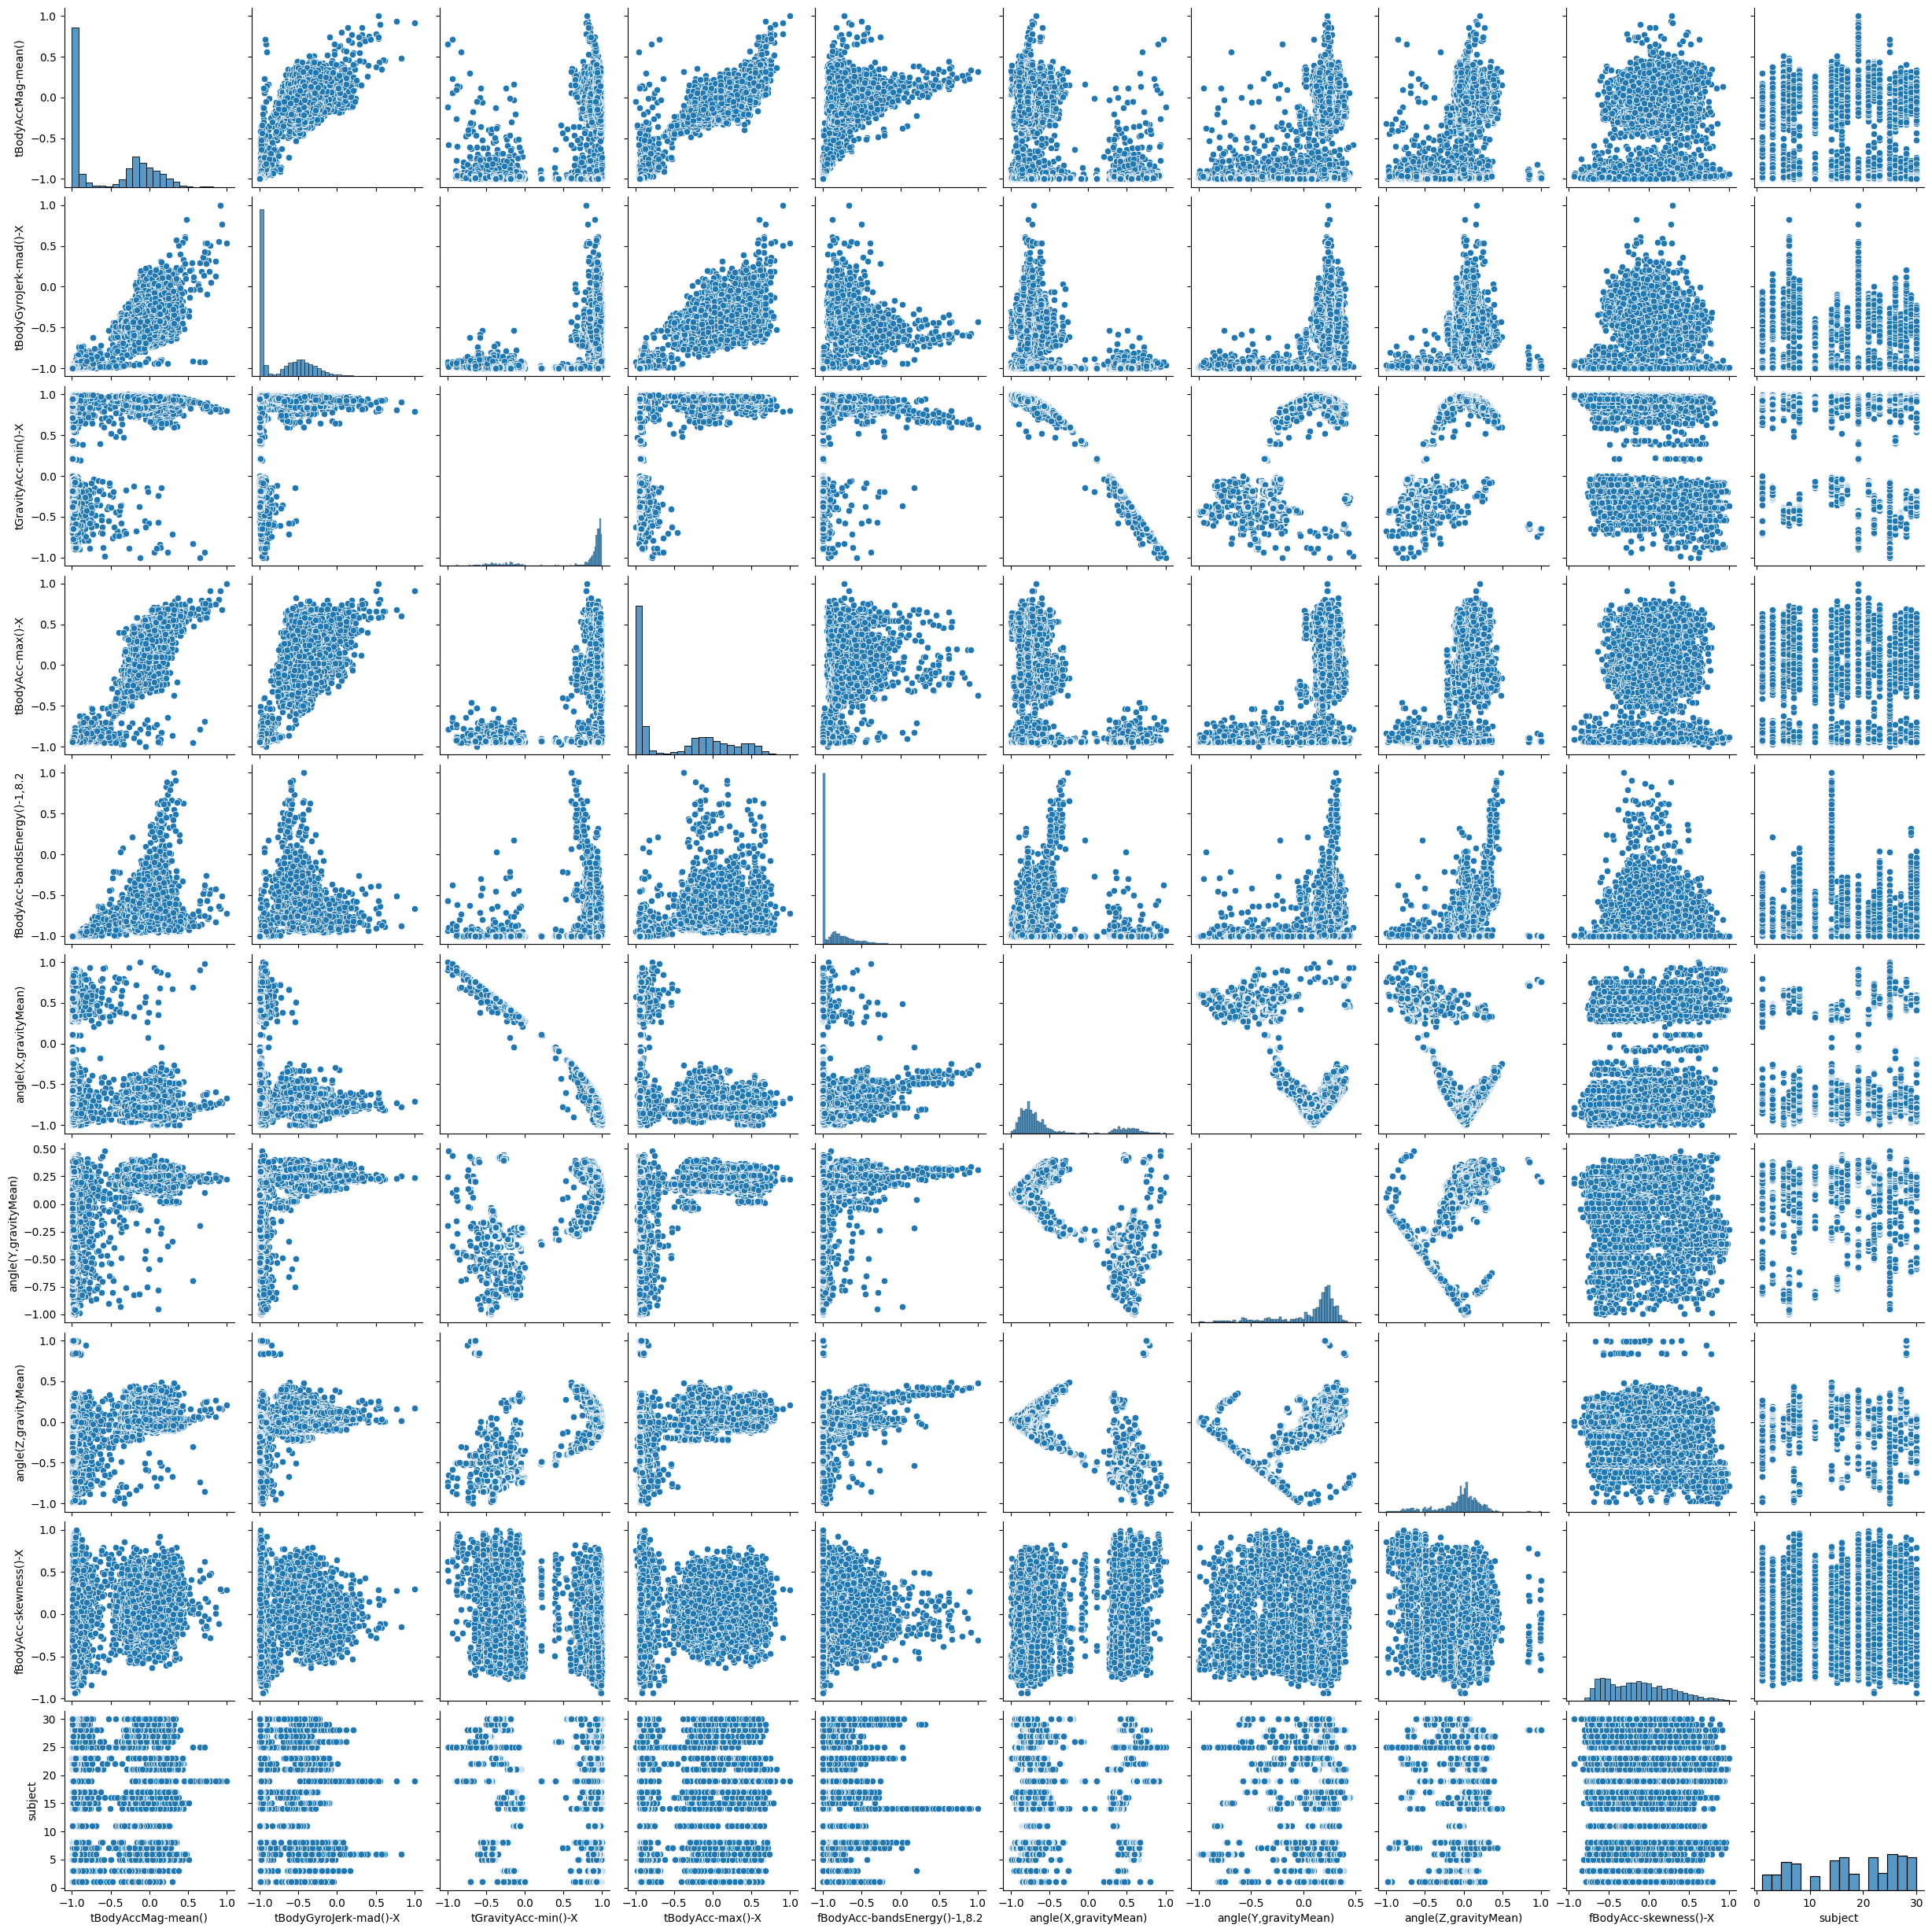

In [ ]:
sns.pairplot(train)





# ▶Удобно не было.

## 1. Гистограммы по диагонали еще раз подтвердили, что распределение не является нормальным. Пик распределения не лежит в центре, а это значит, что мода не находится рядом со средним значением.
## 2. Многие из представленных графиков, на мой взгляд, имеют экспоненциально распределение: например, по 'fBodyAcc-bandsEnergy()-1,8.2' и  'angle(Y,gravityMean)', график рядом с ним, а также выше
## 3. Спасибо pairpolot, теперь я видела выбросы для всех пар признаков.
## Например, явные выбросы можно увидеть по вертикали по признаку  'angle(Z,gravityMean)' с правой стороны
## 4. Существует линейная зависимость между 2  слева  3 сверху графиком и парным ему, лежащим через диагональ (так как они зеркально отражены). Аналогичная логика может быть применена и к другим графикам, которые являются зеркальным отражением друг друга (лежащих на разных сторонах диагонали)


### Задание 9 (1 балл)

Отобразите плотность распределения (kde) `tBodyAccMag-mean()` для каждой из активностей

Проведите вертикальную линию, которая визуально неплохо разделяет эти группы.

Первую группу называть статическими активностями, а вторую - динамическими.

Какую долю правильных ответов дает ваша вертикальная линия для разделения именно этих двух групп.

С чем может быть связан полученный вами результат? Предположите логическое обоснование (почему именно данный признак так хорошо/плохо разделяет группы активностей).


Text(0.5, 0, 'Body acceleration')

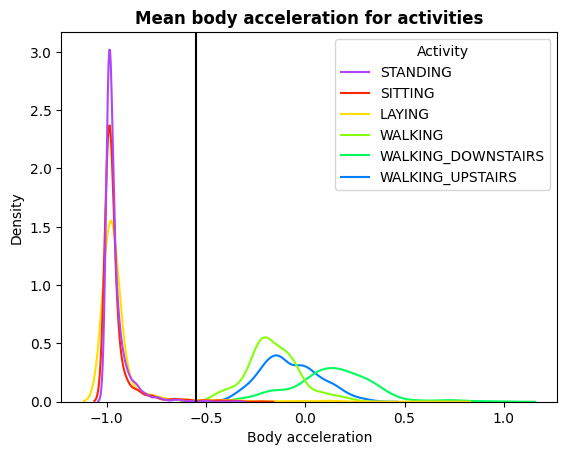

In [ ]:
sns.kdeplot(data=train, x='tBodyAccMag-mean()',hue='Activity',palette='gist_ncar_r')
plt.axvline(x=-0.55,color='black') #визуально где-то на этой точке
plt.title('Mean body acceleration for activities',fontweight='bold')
plt.xlabel('Body acceleration')

In [ ]:
stat=len(train[train['Activity'].isin(['STANDING', 'SITTING', 'LAYING'])]) #сколько всего правильных ответов в статике
dyna=len(train[train['Activity'].isin(['WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS'])])
a=train['pred']='0' #создаю новый столбец куда буду записывать как "сработало" мое деление прямой (0 - статика, 1 - динамика)
b=train.loc[train['tBodyAccMag-mean()']>-0.55,'pred']='1' #все что выше -0.55 определяю как динамику и записываю с иницированный столбец
s_graph=len(train[train['pred']=='0'].value_counts()) #подсчитываю, сколько входит статики
d_graph=len(train[train['pred']=='1'].value_counts())
print("Доля правильных ответов для статических:", (s_graph/stat)*100,'%')
print("Доля правильных ответов для статических:", (d_graph//dyna)*100,"%")
train=train.drop('pred',axis=1) #подчищаю улики

Доля правильных ответов для статических: 98.35259404966806 %
Доля правильных ответов для статических: 100 %


#▶Результат очень приятный. Данный признак так успешен, так как при сидении, стоянии, лежании среднее значение ускорения, а точнее  направление вектора ускорения (подозреваю) отрицательно после нормализации , а при движении среднее ускорении растет, что неудивительно. В связи с чем образуются две группы. Но есть и та самая переходная граница в -0.55, которую я удачно нашла и использовала в корыстных целях для разделения на статику и динамику.

### Задание 10 (0.5 балла)

Поздравляем, вы проверили первую гипотезу в процессе EDA. Однако нам бы хотелось уметь не группы разделять, а каждый отдельный вид активности. Попробуйте нарисовать "ящики с усами" для `angle(X,gravityMean)` с разделением по разным видам активности на данных train. Можно ли сделать какой-то вывод по полученной визуализации? Проанализируйте и проинтерпретируйте полученные картинки (если заметили какую-то особенность, может какая-то категория значительно выделяется, то предположите, почему так могло произойти).

Вам может пригодиться:
- sns.boxplot

Text(0, 0.5, 'Angle')

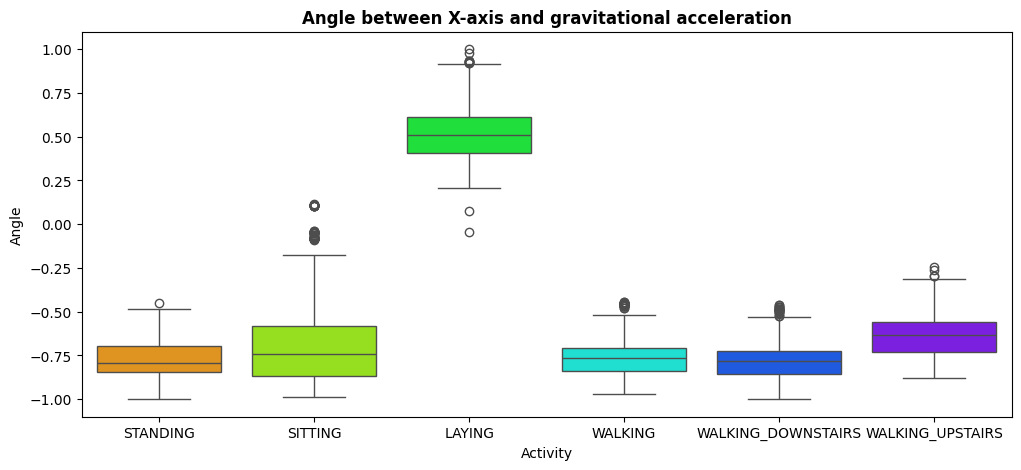

In [ ]:
plt.figure(figsize=(12,5))
sns.boxplot(data=train,x='Activity',y='angle(X,gravityMean)',palette='gist_rainbow')
plt.title('Angle between X-axis and gravitational acceleration', fontweight='bold')
plt.ylabel('Angle')

#▶ Сильно выделяется категория "Laying", это связано с тем, что угол между Х и угол гравитационного ускорения практически совпадают при положении лежа, а при других активностях такого не происходит

### Задание 11 (0.5 балла)

Посмотрим теперь на `tBodyAcc-max()-X`. Визуализируйте скрипичные диаграммы для этого признака с разделением по активностям на всем train. Кажется логичным, что максимальное ускорение в моменте для разных активностей будет различаться. Однако есть ли активность, которая будет выделяться? Если да, то предложите объяснение, почему эта активность выделяется.

Вам может пригодиться:
- sns.violinplot

Text(0, 0.5, 'Maximal acceleration')

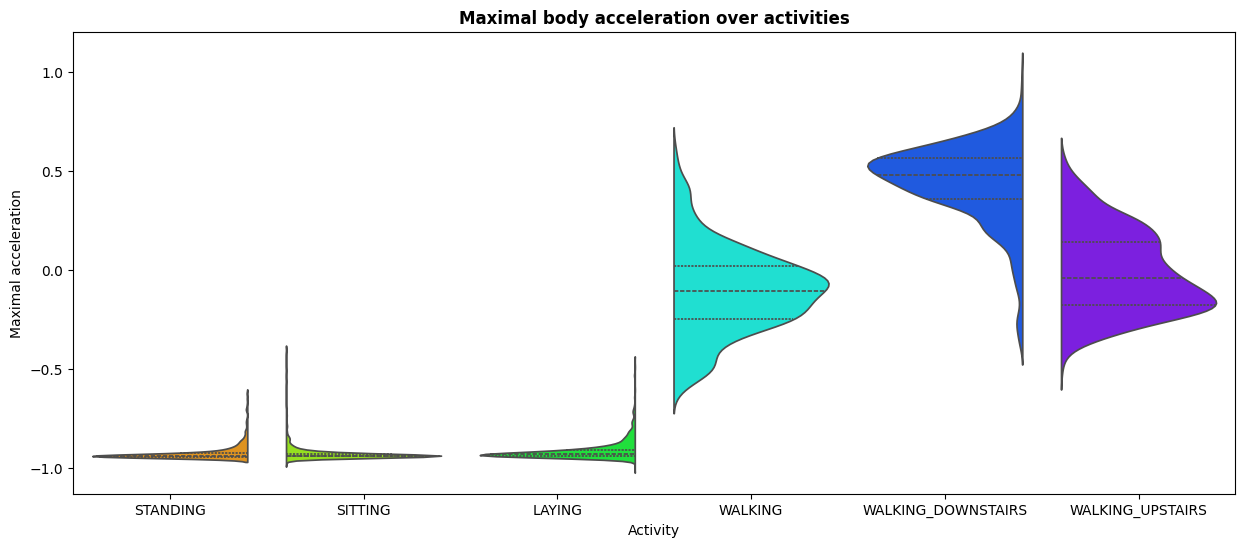

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.violinplot(data=train, x='Activity', y='tBodyAcc-max()-X',palette='gist_rainbow', split='half', inner='quart') #делю напополам, а также вставляю внутрь квартили вместо боксплота, как по умолчанию
fig.set_figwidth(15)
plt.title('Maximal body acceleration over activities',fontweight='bold')
plt.ylabel('Maximal acceleration')

#▶ Выделяется 'Walking downstairs'. Связано это с тем, что данный вид активности по вектору сонаправлен гравитационному вектору, поэтому ускорение самое высокое из всех предложенных активностей, это видно и по "скрипкам". А также по "хвосту" выбранного признака в том числе, но больше всего по медиане внутри графика

### Задание 12 (1 балл)

На одной картинке покажите распределения `fBodyAcc-bandsEnergy()-1,8.2` для динамичных активностей (boxenplot - немного измененый "ящик с усами") и `angle(Y,gravityMean)` для статических - тут хватит и простой гистограммы (прямо, как в примере ниже).

Можно ли выделить еще какие-то активности?

plt.subplots или matplotlib.gridspec (заметили, что один график больше другого? попробуйте сами так сделать - вам понравится...)


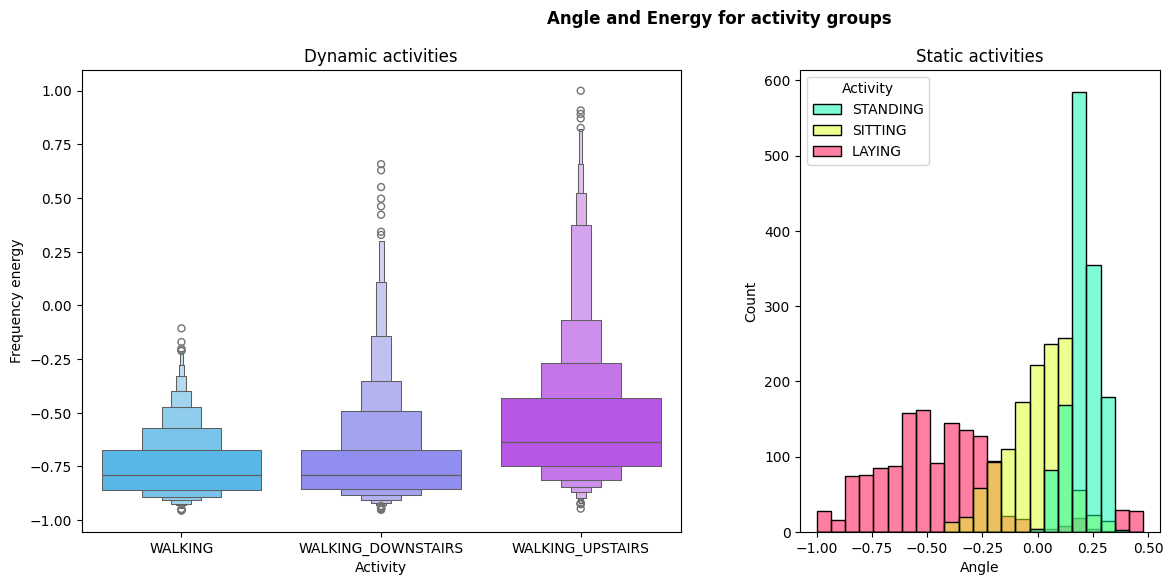

In [ ]:
g,(a1, a2) =plt.subplots(1, 2,figsize=(17,6))
plt.suptitle('Angle and Energy for activity groups', fontweight='bold')
dyn=train[train['Activity'].isin(['WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS'])]
stat=train[train['Activity'].isin(['STANDING','LAYING','SITTING'])]
plt.subplot(1,2,1)
sns.boxenplot(data=dyn,x='Activity',y='fBodyAcc-bandsEnergy()-1,8.2',palette='cool')
plt.title('Dynamic activities')
plt.ylabel('Frequency energy')
plt.subplot(1,2,2)
a=sns.histplot(data=stat,x='angle(Y,gravityMean)',hue='Activity',palette='gist_ncar')
plt.title('Static activities')
plt.xlabel('Angle')
box=a2.get_position() #текущие размеры графика фиксирую в боксе
a2.set_position([box.x0, box.y0, box.width*0.6, box.height]) #изменяю ширину, делаю ее меньше, все остальное на своих законных местах
#мне очень не понравилось делать один график меньше другого :(

#▶ Из динамических выделяется "Walking upstairs", так как по графику видно, что затрата энергии при этой активности максимальная
######не буду позориться и насиловать тут физику, пожалуйста, поверьте на слово, что и в жизни так :(


# Из статических на пике - стояние

### Задание 13 (0.5 балла)

На первом графике будет боксплот распределения `fBodyAcc-skewness()-X` по активностям.

Разделимы ли категории по `fBodyAcc-skewness()-X`? А если взять только те строки, где `fBodyAcc-skewness()-X < -0.376`, и теперь вывести боксплот распределения `angle(Y,gravityMean)` по разным активностям? Попробуйте и напишите, выделилась ли какая-то категория?


Text(0, 0.5, 'Angle')

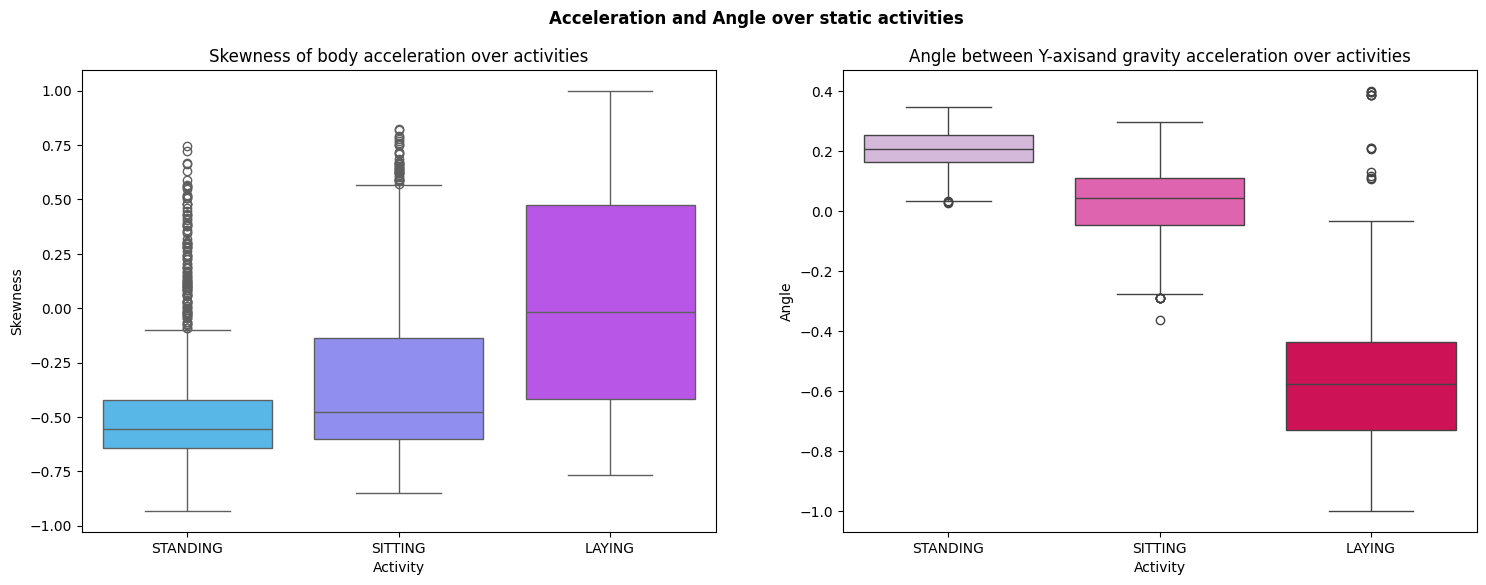

In [ ]:
plt.subplots(1, 2,figsize=(18,6))
plt.suptitle('Acceleration and Angle over static activities', fontweight='bold')
plt.subplot(1,2,1)
sns.boxplot(data=stat,y='fBodyAcc-skewness()-X',x='Activity',palette='cool')
plt.title('Skewness of body acceleration over activities')
plt.ylabel('Skewness')
stat_small=stat[stat['fBodyAcc-skewness()-X']<-0.376]
plt.subplot(1,2,2)
sns.boxplot(data=stat_small,y='angle(Y,gravityMean)',x='Activity',palette='PuRd', saturation=1)
plt.title('Angle between Y-axisand gravity acceleration over activities')
plt.ylabel('Angle')

#▶Замечу печальное количество выбросов у категории "Standing", этим она точно выделяется

# Но подозреваю, что нужно указать на особенности именно боксплотов в сравнении (а выбирать тут приходится только из двух активностей, стояние только в одном графике), поэтому после laying, которая бьет просто все рекорды по минимальным  углам между всем чем только можно (и икс в предыдущих заданиях, и игрек тут), следующей категорией будет 'sitting', которая демонстриует относительно низкую ассиметричность ускорения и по углу между У и гравитационным ускорением.

### Задание 14 (1 балл)

Из доступных признаков, сначала посмотрите на распределение `tBodyAcc-max()-X` на динамических активностях (скрипичная диаграмма отлично подойдет).

А теперь спускаем вам порог `tBodyAcc-max()-X < 0.157`. Для таких строк постройте диаграмму рассеяния для признака `tGravityAcc-min()-X`. Да, получается неидеально, но это честная работа. Можно выбрать порог так, чтобы чисто из таблицы с динамическими активностями из строк, где `tBodyAcc-max()-X < 0.157`, выбрать по некоторому порогу для `tGravityAcc-min()-X` строки так, чтобы доля правильных ответов на оставшейся категории была не меньше 83%!


1768


Text(931.131313131313, 0.5, '')

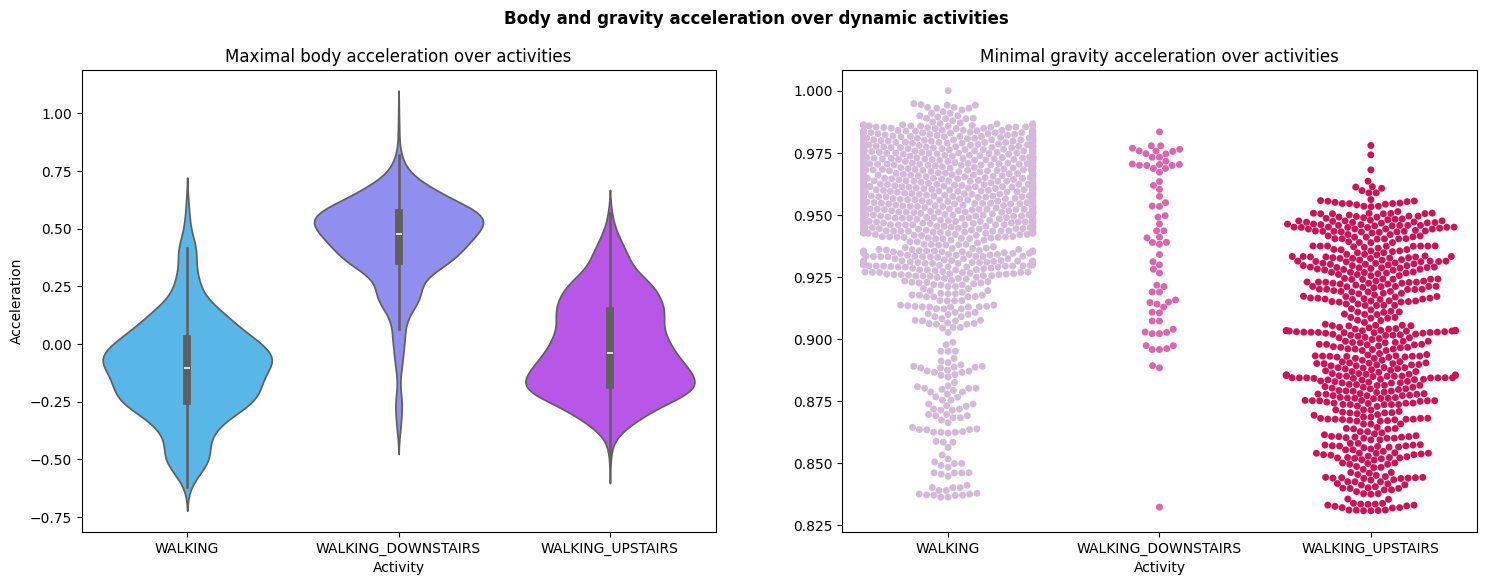

In [ ]:
plt.subplots(1, 2,figsize=(18,6))
plt.suptitle('Body and gravity acceleration over dynamic activities', fontweight='bold')
plt.subplot(1,2,1)
sns.violinplot(data=dyn,x='Activity',y='tBodyAcc-max()-X',palette='cool')
plt.title('Maximal body acceleration over activities')
plt.ylabel('Acceleration')
dyn_porog=dyn[(dyn['tBodyAcc-max()-X']<0.157)&(dyn['tGravityAcc-min()-X']>0.83)] #общее условие, чтобы построить swarmplot
plt.subplot(1,2,2)
sns.swarmplot(data=dyn_porog,x='Activity',y='tGravityAcc-min()-X',palette='PuRd')
plt.title('Minimal gravity acceleration over activities')
plt.ylabel('')

# Больше всех выделилась ходьба ('Walking'). При минимальном ускорении тела среди других активностей (график 1), ходьба имеет большую плотность на графике 2 (от 0.925 и выше), связанном с минимальным гравитационным ускорением

### Задание 15 (0.5 балла)

Теперь попробуем более интерактивные графики. Установите библиотеку `plotly` (обычно `pip install plotly` или `conda install plotly`). Синтаксис очень похож на `seaborn`, но вот [документация для plotly.express](https://plotly.com/python-api-reference/plotly.express.html).

Сначала подготовим данные для визуализации. Будем считать t-SNE просто "черным ящиком", который принимает наши данные и проецирует их в двумерное или трехмерное пространство. Возможно, придется немного подождать.

In [ ]:
%%time
from sklearn.manifold import TSNE
tsne = TSNE(random_state=666, n_components=2)
new = tsne.fit_transform(train.drop(['subject', 'Activity'], axis=1))
df_2_comp = pd.concat([
    pd.DataFrame(new, columns=['x', 'y']),
    train['Activity']
], axis=1)

tsne = TSNE(random_state=666, n_components=3)
new = tsne.fit_transform(train.drop(['subject', 'Activity'], axis=1))
df_3_comp = pd.concat([
    pd.DataFrame(new, columns=['x', 'y', 'z']),
    train['Activity']
], axis=1)

CPU times: user 6min 49s, sys: 937 ms, total: 6min 50s
Wall time: 4min 16s


Теперь нарисуйте scatter-график через `plotly.express` для `df_2_comp` с выделением цветами активностей. Красиво получилось? Видны скопления точек одного цвета? Можно разные активности отделить линиями на данном графике?

In [ ]:
!pip install plotly
import plotly.express as px
px.scatter(df_2_comp, x='x',y='y',color='Activity')

# Я не ценитель абстракционизма, оставим любование графиком кому-нибудь другому. Отделить линиями хорошо можно лежание, остальные категории сильно накладываются друг на друга на 2-д графике.

Мы не отстаем от трендов и тоже можем в 3D. Сейчас и вы научитесь (если еще не умеете). Нарисуйте scatter_3d-график через `plotly.express` для `df_3_comp` с выделением цветами активностей. Повращайте его. Нормально получилось? Есть ли какая-то структура у точек?

In [ ]:
px.scatter_3d(df_3_comp,x='x',y='y',z='z',color='Activity')

# Не поняла, что значит "структура точек". Однако, явно вижу, что точки сгруппировались в классы по некоторым признакам, скучковались (на 3-д графике это заметнее)

### Задание 16 (1 балл)

Мы сделали вам fit. Ваша очередь сделать predict. Допишите функцию, которая принимает на вход датафрейм с признаками, а выдает вектор из предсказаний - для каждой строки датафрейма вы определяете, к какому классу принадлежит объект. Рекомендуем сразу записывать из строками, а не кодировать в числа. Дальше фукнция `accuracy_score` выдаст вам долю правильных ответов.

Подсказка: вы уже отделили категории друг от друга по каким-то признакам. Воспользуйтесь этим знанием! Используя только проведенный вами анализ можно спокойно выбить не менее 75% на train и test! Если вы получите меньше 75%, то балл будет снижен. Авторское решение (на основе всех графиков выше) выбивает 81% и 77% на train и test соответственно. [Шапргалка с готовыми идеями для такой задачи](https://www.youtube.com/watch?v=dQw4w9WgXcQ)

In [ ]:
def predict(df: pd.DataFrame):
  np.array
    pass

def accuracy_score(y_true, y_pred) -> float:
    y_true = np.asarray(y_true).reshape(-1, 1)
    y_pred = np.asarray(y_pred).reshape(-1, 1)
    return (y_true == y_pred).mean()

In [ ]:
train_preds = predict(train)
test_preds = predict(test)
print(f"Accuracy on train set => {accuracy_score(train['Activity'], train_preds)}")
print(f"Accuracy on test set => {accuracy_score(test['Activity'], test_preds)}")

__Место для мема и/или фидбэка__